In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [7]:
data = pd.read_csv('../train.csv')

In [8]:
data.head()

,blueFirstBlood,blueKills,blueDeaths,blueGoldDiff,blueExperienceDiff,blueWardsPlacedDiff,blueWardsDestroyedDiff,blueAvgLevelDiff,blueAssistsDiff,blueTotalMinionsKilledDiff,blueTotalJungleMinionsKilledDiff,blueEliteMonstersDiff,blueDragonsDiff,blueHeraldsDiff,blueTowersDestroyedDiff,blueWins
0,0,5,3,976,1599,-21,2,0.4,1,10,19,1,1,0,0,1
1,1,5,4,780,523,-16,0,-0.2,0,0,12,2,1,0,0,1
2,0,6,14,-4443,-4140,1,0,-1.0,-5,-27,-20,-1,-1,0,0,1
3,0,4,7,-1903,-584,-25,-1,0.0,-8,-10,-17,-1,-1,0,0,0
4,0,5,10,-3731,-1458,10,1,-0.6,-3,-25,-5,-1,-1,0,0,1


In [9]:
X = data.loc[:, data.columns != 'blueWins']
y = data['blueWins']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
pipe_dummy = make_pipeline(DummyClassifier(strategy="stratified",random_state=41))
pipe_dummy.fit(X_train, y_train)
y_pred = pipe_dummy.predict(X_test)
print('Test accuaracy: %.3f' % pipe_dummy.score(X_test, y_test))

Test accuaracy: 0.493


In [15]:
pipe_dummy = make_pipeline(StandardScaler(),
                        DummyClassifier(strategy="stratified",random_state=49))
pipe_dummy.fit(X_train, y_train)
y_pred = pipe_dummy.predict(X_test)
print('Test accuaracy: %.3f' % pipe_dummy.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Test accuaracy: 0.507
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1040
           1       0.51      0.51      0.51      1035

    accuracy                           0.51      2075
   macro avg       0.51      0.51      0.51      2075
weighted avg       0.51      0.51      0.51      2075



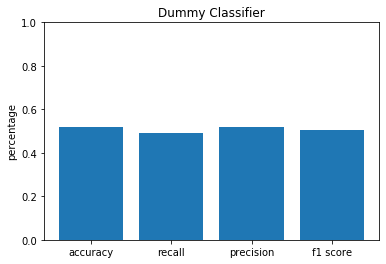

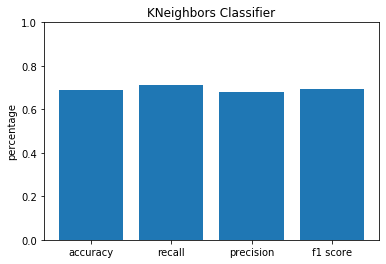

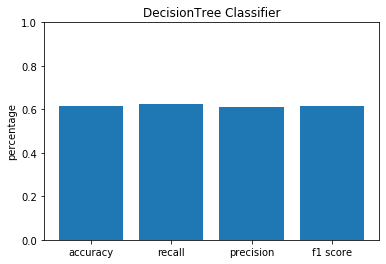

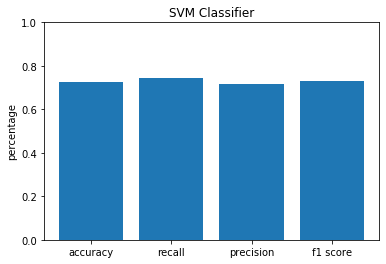

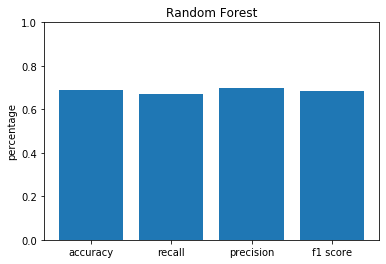

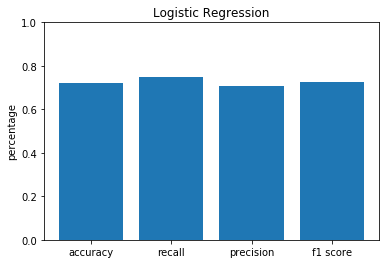

In [18]:
def Logistic_Regression():
    lr_clf = LogisticRegression(max_iter=1000,solver='lbfgs',random_state=5)
    return lr_clf
def KNeighbors_Classifier():
    knn_clf = KNeighborsClassifier()
    return knn_clf
def DecisionTree_Classifier():
    tree_clf = DecisionTreeClassifier(random_state=6)
    return tree_clf
def Random_Forest():
    rf_clf = RandomForestClassifier(n_estimators=10,random_state=1)
    return rf_clf
def Svm_Classifier():
    svm_clf = SVC(gamma='scale',random_state=3)
    return svm_clf
def graph_model(clfs):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    metricArray = [accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred), f1_score(y_test, y_pred)]
    x=[0,1,2,3]
    labels=['accuracy','recall', 'precision', 'f1 score']
    plt.bar(x,metricArray)
    plt.xticks(x,labels)
    plt.ylim(0,1)
    plt.ylabel('percentage')
    plt.title(label)
    plt.show()
    
#“stratified”: generates predictions by respecting the training set’s class distribution.
dummy_clf = DummyClassifier(strategy="stratified",random_state=99)
clfs = [dummy_clf, KNeighbors_Classifier(), DecisionTree_Classifier(), 
        Svm_Classifier(), Random_Forest(),Logistic_Regression()]
clf_labels = ['Dummy Classifier','KNeighbors Classifier','DecisionTree Classifier',
              'SVM Classifier','Random Forest','Logistic Regression']
for label,clf in zip(clf_labels,clfs):
    graph_model(clf)

In [19]:
for label,clf in zip(clf_labels,clfs):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
    print("accuracy: %0.3f (+/- %0.3f) [%s]"
    % (scores.mean(), scores.std(), label))

accuracy: 0.502 (+/- 0.013) [Dummy Classifier]
accuracy: 0.681 (+/- 0.009) [KNeighbors Classifier]
accuracy: 0.635 (+/- 0.020) [DecisionTree Classifier]
accuracy: 0.722 (+/- 0.011) [SVM Classifier]
accuracy: 0.701 (+/- 0.014) [Random Forest]
accuracy: 0.729 (+/- 0.007) [Logistic Regression]
